Importing our dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_miner = pd.read_csv('https://raw.githubusercontent.com/SollyLolly/bitcoin/main/block_miner.csv')
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False) # print all columns in full, prevent line break

print(df_miner.shape)
print(df_miner.info())
print(df_miner.describe())
print(df_miner.head())

(721800, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721800 entries, 0 to 721799
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   block_height  721800 non-null  int64 
 1   hash          721800 non-null  object
 2   miner_name    719854 non-null  object
 3   miner_hash    719854 non-null  object
dtypes: int64(1), object(3)
memory usage: 22.0+ MB
None
        block_height
count  721800.000000
mean   360899.500000
std    208365.856488
min         0.000000
25%    180449.750000
50%    360899.500000
75%    541349.250000
max    721799.000000
   block_height                                                              hash miner_name                          miner_hash
0             0  000000000019d6689c085ae165831e934ff763ae46a2a6c172b3f1b60a8ce26f    Unknown  1A1zP1eP5QGefi2DMPTfTL5SLmv7DivfNa
1             1  00000000839a8e6886ab5951d76f411475428afc90947ee320161bbf18eb6048    Unknown  12c6DSiU4Rq3P4ZxziKxzrL

Checking for missing values

In [2]:
df_miner.isnull().sum()

block_height       0
hash               0
miner_name      1946
miner_hash      1946
dtype: int64

In [3]:
# Drop NANs
df_miner.dropna(axis=0, inplace=True)

Exploratory Data analysis

In [4]:
df_miner['miner_name'].value_counts()

Unknown              369584
F2Pool                68245
AntPool               60210
SlushPool             32692
BTC.com               31060
                      ...  
EkanemBTC                 1
Tricky's BTC Pool         1
Bravo Mining              1
RigPool                   1
7pool                     1
Name: miner_name, Length: 73, dtype: int64

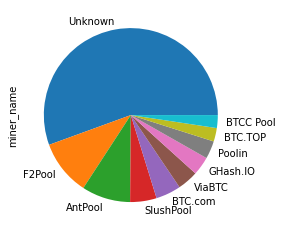

In [5]:
miner_count = df_miner['miner_name'].value_counts()
miner_list = miner_count[miner_count > 10000].index.tolist()
df_miner = df_miner[df_miner['miner_name'].isin(miner_list)]
df_miner['miner_name'].value_counts().plot(kind="pie")

In [6]:
df_miner['miner_hash'].value_counts()

1KFHE7w8BhaENAswwryaoccDb6qcT6DbYY    68245
14cZMQk89mRYQkDEj8Rn25AnGoBi5H6uer    26204
18cBEMRxXHqzWWCxZNtU91F5sbUNKhL5PX    25627
1CK6KHY6MHgYvmRQ4PAafKYDrg1ejbH1cE    23853
1CjPR7Z5ZSyWk6WtXvSFgkptmpoi4UM9BC    23083
                                      ...  
152SToutCjJbe3Fvv8x3eiLSpQ1VmLkFGK        1
1KQ32ZkqeErZj969m1gj9xB3mgfEc79Fhk        1
1A1pvusc65Xc3WxpKhKCLR2c63sGECwe78        1
1Fs3JPwvycV4jM88HgkX6fpuNVXLNuCLvY        1
3EoqjNmeaaVvVDCPbVXxQQRH6UFpDUqpPg        1
Name: miner_hash, Length: 202740, dtype: int64

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/SollyLolly/bitcoin/main/block_miner.csv')
pd.set_option('display.max_rows', None)
df1.drop(['block_height', 'hash'], axis = 1)
df1.dropna(axis=0, inplace=True)
combo = df1.groupby(['miner_name', 'miner_hash']).size()
combo
